In [ ]:
import matplotlib.pyplot as plt
import torch.nn as nn
import torch.optim as optim
from matplotlib.axes import Axes
from matplotlib.figure import Figure
from torch import cat, cos, float32, linspace, meshgrid, pi, stack, tensor

# First

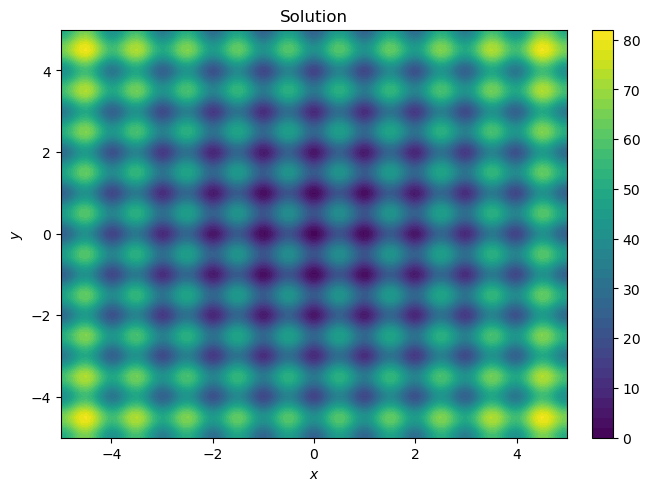

In [112]:
X, Y = meshgrid(
    linspace(start=-5, end=5, steps=100),
    linspace(start=-5, end=5, steps=100),
    indexing="xy",
)

fig: Figure
ax: Axes
with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        20
        + (X * X - 10 * cos(tensor(2 * pi) * X))
        + (Y * Y - 10 * cos(tensor(2 * pi) * Y)),
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    fig.colorbar(mappable=img)

In [113]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 64), nn.ReLU(), nn.Linear(64, 64), nn.ReLU(), nn.Linear(64, 1)
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [ ]:
XTrain, YTrain = meshgrid(linspace(-3, 3, 100), linspace(-3, 3, 100), indexing="xy")
ZTrain = (
    20
    + (XTrain * XTrain - 10 * cos(tensor(2 * pi) * X))
    + (YTrain * YTrain - 10 * cos(tensor(2 * pi) * Y))
)
lossFunction = nn.MSELoss()
net = Net()
losses = []
for _ in range(10000):
    zPred = net(cat((XTrain.reshape(-1, 1), YTrain.reshape(-1, 1)), dim=1))
    loss = lossFunction(zPred.reshape(XTrain.shape), ZTrain)
    net.zero_grad()
    loss.backward()
    for param in net.parameters():
        param.data -= 0.001 * param.grad
    losses.append(loss.data)

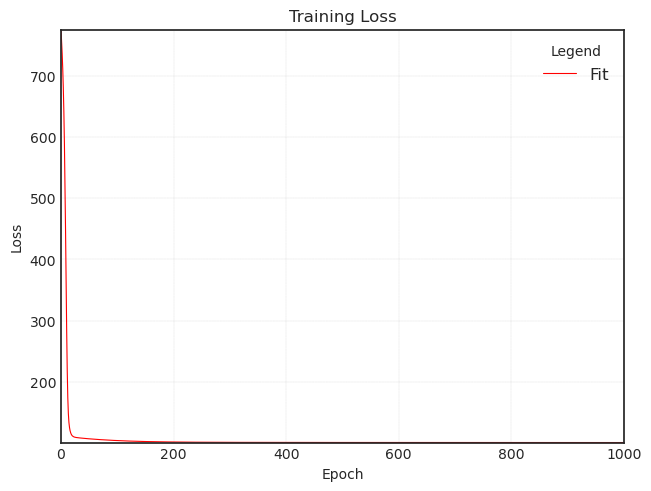

In [115]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min() - 8e-2, top=stack(losses).max() + 2e-1)
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )

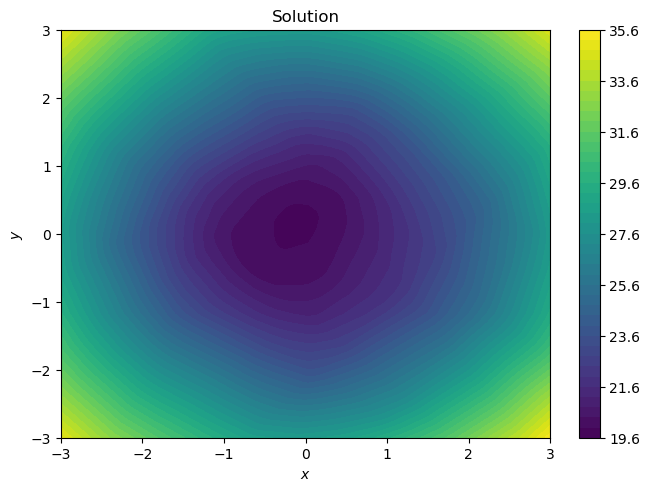

In [117]:
X, Y = meshgrid(
    linspace(start=-3, end=3, steps=100),
    linspace(start=-3, end=3, steps=100),
    indexing="xy",
)

with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        net(cat((X.reshape(-1, 1), Y.reshape(-1, 1)), dim=1)).reshape(X.shape).data,
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    fig.colorbar(mappable=img)

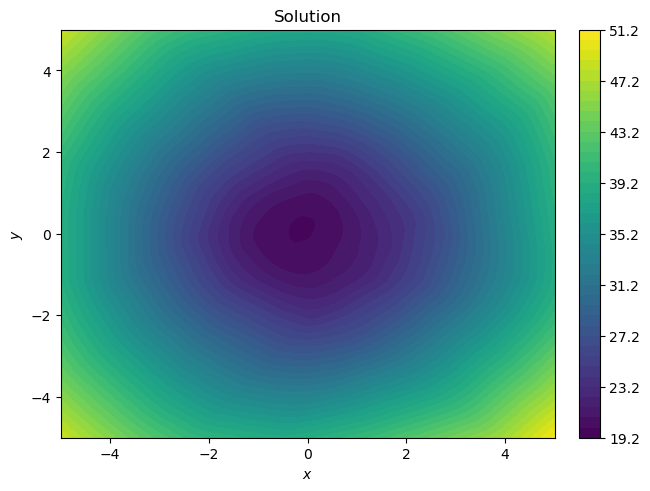

In [118]:
X, Y = meshgrid(
    linspace(start=-5, end=5, steps=100),
    linspace(start=-5, end=5, steps=100),
    indexing="xy",
)

with plt.style.context("fast"):
    fig, ax = plt.subplots(layout="constrained")
    img = ax.contourf(
        X,
        Y,
        net(cat((X.reshape(-1, 1), Y.reshape(-1, 1)), dim=1)).reshape(X.shape).data,
        levels=50,
    )
    ax.set_xlabel(xlabel=r"$x$")
    ax.set_ylabel(ylabel=r"$y$")
    ax.set_title(
        label="Solution",
        loc="center",
        wrap=True,
    )
    fig.colorbar(mappable=img)

# Second

In [119]:
X = tensor(data=[[0, 0], [0, 1], [1, 0], [1, 1]], dtype=float32)
y = tensor(data=[[0], [1], [1], [0]], dtype=float32)


class NetXOR(nn.Module):
    def __init__(self):
        super(NetXOR, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(2, 2), nn.ReLU(), nn.Linear(2, 1), nn.Sigmoid()
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [120]:
net = NetXOR()
optimizer = optim.SGD(net.parameters(), lr=0.1)
lossFunction = nn.MSELoss()
losses = []
for epoch in range(10000):
    yPred = net(X)
    loss = lossFunction(yPred, y)
    net.zero_grad()
    loss.backward()
    optimizer.step()
    losses.append(loss.data)
    if epoch % 1000 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")

Epoch 0, Loss: 0.255962610244751
Epoch 1000, Loss: 0.17245279252529144
Epoch 2000, Loss: 0.16746152937412262
Epoch 3000, Loss: 0.16702203452587128
Epoch 4000, Loss: 0.16688646376132965
Epoch 5000, Loss: 0.16682614386081696
Epoch 6000, Loss: 0.16678175330162048
Epoch 7000, Loss: 0.16676382720470428
Epoch 8000, Loss: 0.1667456477880478
Epoch 9000, Loss: 0.16674023866653442


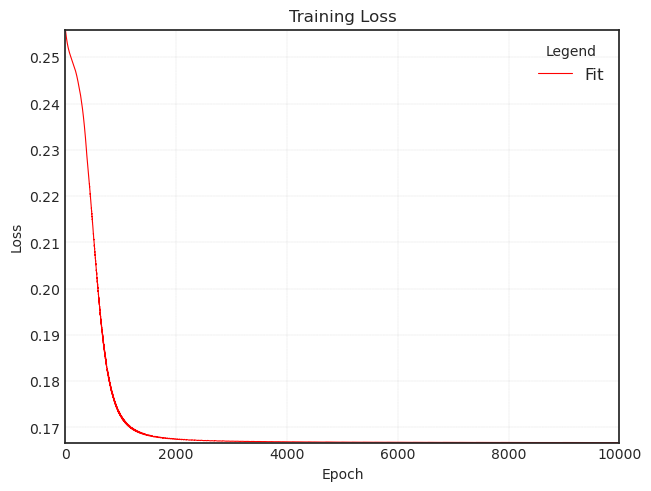

In [125]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )

In [123]:
net(X)

tensor([[0.6663],
        [0.6663],
        [0.6663],
        [0.0155]], grad_fn=<SigmoidBackward0>)

# Third

In [128]:
from pandas import read_csv
from torch.utils.data import DataLoader

In [129]:
data = read_csv(filepath_or_buffer="house_price_regression_dataset.csv")

In [130]:
data.describe()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03
mean,2815.422000,2.990000,1.973000,1986.550000,2.778087,1.022000,5.615000,6.188610e+05
std,1255.514921,1.427564,0.820332,20.632916,1.297903,0.814973,2.887059,2.535681e+05
min,503.000000,1.000000,1.000000,1950.000000,0.506058,0.000000,1.000000,1.116269e+05
25%,1749.500000,2.000000,1.000000,1969.000000,1.665946,0.000000,3.000000,4.016482e+05
50%,2862.500000,3.000000,2.000000,1986.000000,2.809740,1.000000,6.000000,6.282673e+05
75%,3849.500000,4.000000,3.000000,2004.250000,3.923317,2.000000,8.000000,8.271413e+05
max,4999.000000,5.000000,3.000000,2022.000000,4.989303,2.000000,10.000000,1.108237e+06


In [131]:
data.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [132]:
X, y = data.drop(labels="House_Price", axis=1), data["House_Price"]
X_scaled = (X - X.mean()) / X.std()
y_scaled = (y - y.mean()) / y.std()
loader = DataLoader(
    dataset=list(zip(X_scaled.values, y_scaled.values)),
    batch_size=32,
    shuffle=True,
)

In [133]:
X.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,1360,2,1,1981,0.599637,0,5
1,4272,3,3,2016,4.753014,1,6
2,3592,1,2,2016,3.634823,0,9
3,966,1,2,1977,2.730667,1,8
4,4926,2,1,1993,4.699073,0,8


In [134]:
X_scaled.head()

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,-1.159223,-0.693489,-1.186106,-0.268988,-1.678439,-1.254030,-0.213020
1,1.160144,0.007005,1.251933,1.427331,1.521629,-0.026995,0.133354
2,0.618533,-1.393983,0.032914,1.427331,0.660092,-1.254030,1.172473
3,-1.473039,-1.393983,0.032914,-0.462853,-0.036536,-0.026995,0.826100
4,1.681046,-0.693489,-1.186106,0.312607,1.480068,-1.254030,0.826100


In [135]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(7, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 64),
            nn.ReLU(),
            nn.Linear(64, 1),
        )

    def forward(self, x):
        x = self.model(x)
        return x

In [136]:
error = nn.MSELoss()
net = Net()
optimizer = optim.Adam(net.parameters(), lr=0.01)
losses = []
for i in range(1000):
    for x_batch, y_batch in loader:
        y_pred = net(x_batch.float())
        loss = error(y_pred.reshape(-1), y_batch.float())
        net.zero_grad()
        loss.backward()
        optimizer.step()
        losses.append(loss.data)

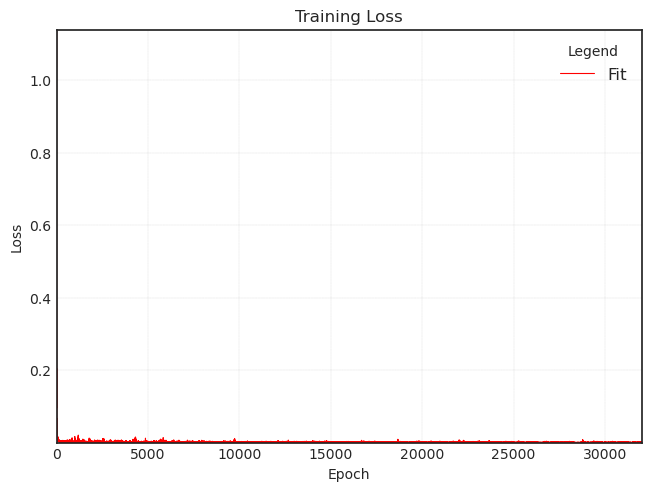

In [137]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.plot(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )

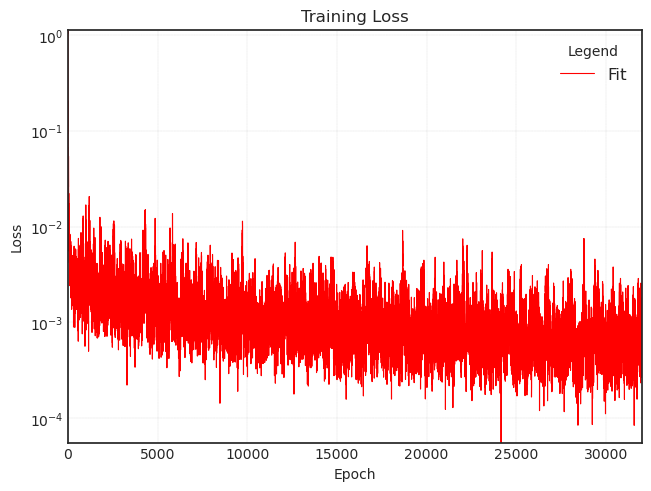

In [139]:
with plt.style.context("seaborn-v0_8-white"):
    fig, ax = plt.subplots(layout="constrained")
    ax.semilogy(
        losses,
        color="red",
        label="Fit",
        linestyle="solid",
        linewidth=0.8,
    )
    ax.grid(c="gray", linewidth=0.1, linestyle="dashed")
    ax.set_xlim(left=0, right=stack(losses).size()[0])
    ax.set_ylim(bottom=stack(losses).min(), top=stack(losses).max())
    ax.set_xlabel(xlabel="Epoch")
    ax.set_ylabel(ylabel="Loss")
    ax.legend(loc="best", title="Legend", shadow=True, fontsize=12)
    ax.set_title(
        label="Training Loss",
        loc="center",
        wrap=True,
    )